# Evaluation

In [87]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

log = LogisticRegression(max_iter=100000000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

## Linear Classifiers

### Classification Report

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.93      0.90        14
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### Confusion Matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 14]])

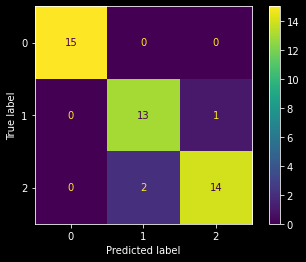

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=log.classes_)

# plotting the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                                  display_labels=log.classes_)
confusion_matrix_display.plot()

Text(33.0, 0.5, 'Real')

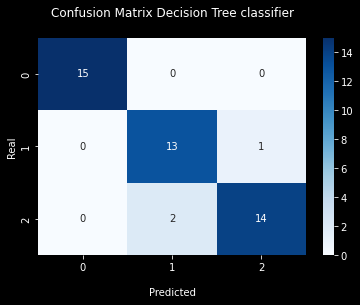

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Decision Tree classifier\n')
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Real')

In [90]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, y_pred))

[[[30  0]
  [ 2 13]]

 [[23  2]
  [ 0 20]]

 [[35  0]
  [ 0 10]]]


### ROC

Just some preprocessing. You can only do ROC on a binary classifier. The code below is just transforming the task into a binary problem

In [78]:
import numpy as np

log2 = LogisticRegression()

conditions = [(y_test == 1) & (y_test == 2), (y_test == 0)]
outputs = [0, 1]
y_test = np.select(conditions, outputs)

conditions = [(y_train == 1) & (y_train == 2), (y_train == 0)]
outputs = [0, 1]
y_train = np.select(conditions, outputs)

X_train = X_train[:,0].reshape(-1, 1)
X_test = X_test[:,0].reshape(-1, 1)

log2.fit(X_train, y_train)

y_pred = log2.decision_function(X_test)


Visualizing the ROC curve

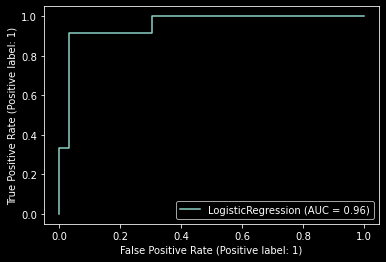

In [79]:
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator(log2, X_test, y_test)

### ROC-AUC

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print(f'AUC: {auc}')

AUC: 0.9570707070707071


In [81]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.9570707070707071


### Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log, X_train, y_train, cv =5)
print(f'Scores: {scores}')
print(f'Average: {scores.mean()}')

Scores: [0.81481481 0.77777778 0.85185185 0.80769231 0.57692308]
Average: 0.7658119658119658


Con Shuffle Split

In [91]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
cross_val_score(log, X, y, cv=cv)

array([1.        , 0.94444444, 0.94444444, 0.94444444, 0.98148148])

### R^2

In [92]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9181818181818182


### MSE

In [93]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

0.044444444444444446


### RMSE

In [94]:
from math import sqrt

print(sqrt(mean_squared_error(y_test, y_pred)))

0.21081851067789195
